In [1]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.15)

In [3]:
xgbr = XGBRegressor(verbosity=0)
cgbr = CatBoostRegressor(verbose=0)
lgbr = LGBMRegressor(verbosity=-1)

In [4]:
xgbr.fit(xtrain, ytrain)
cgbr.fit(xtrain, ytrain)
lgbr.fit(xtrain, ytrain)


LGBMRegressor(verbosity=-1)

In [5]:
xgbr_score = xgbr.score(xtrain, ytrain)
cbgr_score = cgbr.score(xtrain, ytrain)
lgbr_score = lgbr.score(xtrain, ytrain)


In [6]:
# cross validation score 
cv_score_xgb = cross_val_score(xgbr, xtrain, ytrain, cv=10)
cv_score_catboost = cross_val_score(cgbr, xtrain, ytrain, cv=10)
cv_score_lgbm = cross_val_score(lgbr, xtrain, ytrain, cv=10)


In [7]:
# predictions 
ypred_xgbr = xgbr.predict(xtest)
ypred_cgbr = cgbr.predict(xtest)
ypred_lgbr = lgbr.predict(xtest)

In [8]:
# rmse 
xgb_rmse = mean_squared_error(ytest, ypred_xgbr) ** .5 
cgbr_rmse = mean_squared_error(ytest, ypred_cgbr) ** .5
lgbr_rmse = mean_squared_error(ytest, ypred_lgbr) ** .5


In [9]:
print(f'Training scores\nXGBoost  : {xgbr_score}\nCatboost : {cbgr_score}\nLightGBM : {lgbr_score}')

Training scores
XGBoost  : 0.9999963615089311
Catboost : 0.9968330374712518
LightGBM : 0.9804243639143702


In [10]:
print(f'Cross Validation Scores\nXGBoost  : {cv_score_xgb}\nCatboost : {cv_score_catboost}\nLightGBM : {cv_score_lgbm}')

Cross Validation Scores
XGBoost  : [0.925397   0.8623287  0.89220624 0.92611648 0.87360945 0.9030057
 0.91327117 0.89066948 0.88858414 0.94370977]
Catboost : [0.90749653 0.78850564 0.91273761 0.94537091 0.84937058 0.87269582
 0.92776547 0.91673263 0.9187726  0.91865112]
LightGBM : [0.87744436 0.80104469 0.89848822 0.93433709 0.80422128 0.90857798
 0.92747392 0.8529948  0.82000977 0.91382579]


In [11]:
print(f'RMSE\nXGBoost  : {xgb_rmse}\nCatboost : {cgbr_rmse}\nLightGBM : {lgbr_rmse}')

RMSE
XGBoost  : 4.137348499912345
Catboost : 3.6386088849107896
LightGBM : 4.57989957959187


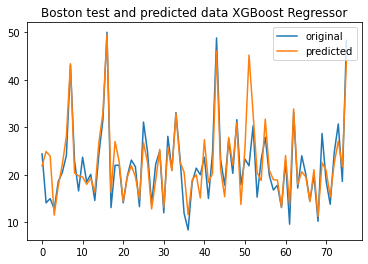

In [12]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_xgbr, label="predicted")
plt.title("Boston test and predicted data XGBoost Regressor")
plt.legend()
plt.show()

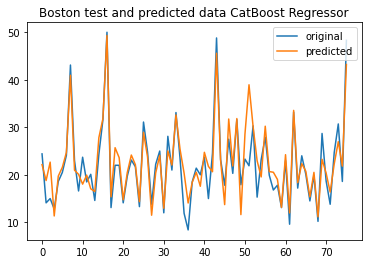

In [13]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_cgbr, label="predicted")
plt.title("Boston test and predicted data CatBoost Regressor")
plt.legend()
plt.show()

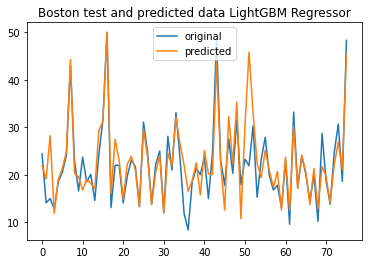

In [14]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_lgbr, label="predicted")
plt.title("Boston test and predicted data LightGBM Regressor")
plt.legend()
plt.show()